In [858]:
import pandas as pd
import numpy as np

In [859]:
df_mi = pd.read_csv('Cleaned12_1.csv')
#df1 = df_mi.dropna(subset=['obesity_student'])
df2 = df_mi.dropna(axis=1)
table =df2.isnull().sum()
table[table>0]

Series([], dtype: int64)

In [860]:
df2.shape

(1967, 389)

In [861]:
df2.head()

,Unnamed: 0,id0,q2_m_edu,q3_m_job,q4_m_jobtype,q8_f_edu,q9_f_job,q10_f_jobtype,q13_mom_livewith,q13_f_livewith,...,q11_f_weight,q12_f_height,student_age,s_q5_gender,s_weight,s_height,obese_s_01,overweight_obese_s,obese_s_012,waist_cuttoff_y2
0,1,0,4,3,10,5,1,8,1,1,...,82.0,175.0,9.52,1,53.0,147.0,1,1,2,0
1,2,1,8,1,3,8,1,3,1,1,...,90.0,180.0,9.46,1,31.9,137.0,0,0,0,0
2,3,2,3,3,10,5,1,9,1,1,...,55.0,175.0,10.40,1,36.9,143.0,0,0,0,0
3,4,3,3,3,10,4,1,8,1,1,...,60.0,175.0,10.15,1,65.7,145.0,1,1,2,1
4,5,4,5,3,10,3,1,7,1,1,...,98.0,170.0,9.68,1,33.8,144.0,0,0,0,0


In [862]:
df_clean = df2
df_clean['m_bmi']=df_clean['q5_m_weight']/(df_clean['q6_m_height']/100)**2
df_clean['f_bmi']=df_clean['q11_f_weight']/(df_clean['q12_f_height']/100)**2
df_clean['obese_m_012']=df_clean['m_bmi'].map(lambda x:(x<25 and int(0)) or (30>x>25 and int(1.0)) or (x>25 and int(2.0)))
df_clean['obese_f_012']=df_clean['f_bmi'].map(lambda x:(x<25 and int(0)) or (30>x>25 and int(1.0)) or (x>25 and int(2.0)))
df_clean.head()

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Unnamed: 0,id0,q2_m_edu,q3_m_job,q4_m_jobtype,q8_f_edu,q9_f_job,q10_f_jobtype,q13_mom_livewith,q13_f_livewith,...,s_weight,s_height,obese_s_01,overweight_obese_s,obese_s_012,waist_cuttoff_y2,m_bmi,f_bmi,obese_m_012,obese_f_012
0,1,0,4,3,10,5,1,8,1,1,...,53.0,147.0,1,1,2,0,21.258469,26.775510,False,1
1,2,1,8,1,3,8,1,3,1,1,...,31.9,137.0,0,0,0,0,30.421850,27.777778,2,1
2,3,2,3,3,10,5,1,9,1,1,...,36.9,143.0,0,0,0,0,29.384757,17.959184,1,False
3,4,3,3,3,10,4,1,8,1,1,...,65.7,145.0,1,1,2,1,52.000000,19.591837,2,False
4,5,4,5,3,10,3,1,7,1,1,...,33.8,144.0,0,0,0,0,24.609375,33.910035,False,2


In [863]:
#prepare the data set
from sklearn.preprocessing import StandardScaler


In [864]:
#df3 = df2.drop(['obesity_student','obese_student','s_weight','s_height','s_waist_circumference','s_hip_circumference','Dep_Var_obesity_status_student'],axis=1)
#print(df3.shape)
X = pd.concat([df_clean.iloc[:,2:-16],df_clean.iloc[:,-2:]],axis=1) 
#drop the father mother and student hight and weight
X.head()

,q2_m_edu,q3_m_job,q4_m_jobtype,q8_f_edu,q9_f_job,q10_f_jobtype,q13_mom_livewith,q13_f_livewith,q13_child_live,q13_grand_live,...,asset_private_toilet,SES_lower,SES_medium,SES_higher,wealth_groups,policyHT3,policyHT4,policyLH2,obese_m_012,obese_f_012
0,4,3,10,5,1,8,1,1,1,0,...,1,0,1,0,3,1,0,0,False,1
1,8,1,3,8,1,3,1,1,1,0,...,1,1,0,0,3,1,0,0,2,1
2,3,3,10,5,1,9,1,1,1,0,...,1,0,1,0,3,1,0,0,1,False
3,3,3,10,4,1,8,1,1,1,0,...,1,1,0,0,3,1,0,0,2,False
4,5,3,10,3,1,7,1,1,1,0,...,1,1,0,0,2,1,1,0,False,2


In [865]:
X.shape

(1967, 377)

In [746]:
X.index = range(len(X)) #reindex for concat later

In [866]:
y = df2.obese_s_01
column = X.columns
column

Index(['q2_m_edu', 'q3_m_job', 'q4_m_jobtype', 'q8_f_edu', 'q9_f_job',
       'q10_f_jobtype', 'q13_mom_livewith', 'q13_f_livewith', 'q13_child_live',
       'q13_grand_live',
       ...
       'asset_private_toilet', 'SES_lower', 'SES_medium', 'SES_higher',
       'wealth_groups', 'policyHT3', 'policyHT4', 'policyLH2', 'obese_m_012',
       'obese_f_012'],
      dtype='object', length=377)

In [748]:
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)


/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [749]:
#KMeans K=2,3,4,5
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [750]:
ks = [2,3,4,5]
m_score = []
s_score = []
label = []
for k in ks:
    labels = KMeans(n_clusters=k, random_state=0).fit_predict(X_ss)
    label.append(labels)
    m = metrics.calinski_harabaz_score(X_ss, labels)
    m_score.append(m)
    s = silhouette_score(X_ss, labels)
    s_score.append(s)

In [753]:
labels_kmeans = pd.DataFrame(label)
labels_kmeans=labels_kmeans.T
labels_kmeans.shape

(1967, 4)

In [754]:
labels_kmeans.columns=['k2','k3','k4','k5']
labels_kmeans.head()

,k2,k3,k4,k5
0,0,1,2,3
1,1,2,1,0
2,0,0,3,3
3,1,2,0,0
4,0,0,2,2


In [755]:
import seaborn as sns
from matplotlib import pyplot as plt

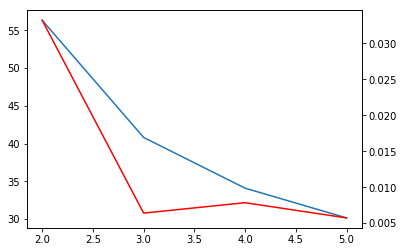

In [756]:
fig = plt.figure()  #from the scores k=2 is the best choice
ax1 = fig.add_subplot(111)
ax1.plot(ks, m_score)
ax2 = ax1.twinx()
ax2.plot(ks, s_score,'r')
plt.show()

In [757]:
cluster=pd.concat([X,labels_kmeans],axis=1)  
cluster.shape

(1967, 381)

In [758]:
cluster.head()

,q2_m_edu,q3_m_job,q4_m_jobtype,q8_f_edu,q9_f_job,q10_f_jobtype,q13_mom_livewith,q13_f_livewith,q13_child_live,q13_grand_live,...,wealth_groups,policyHT3,policyHT4,policyLH2,obese_m_012,obese_f_012,k2,k3,k4,k5
0,4,3,10,5,1,8,1,1,1,0,...,3,1,0,0,False,1,0,1,2,3
1,8,1,3,8,1,3,1,1,1,0,...,3,1,0,0,2,1,1,2,1,0
2,3,3,10,5,1,9,1,1,1,0,...,3,1,0,0,1,False,0,0,3,3
3,3,3,10,4,1,8,1,1,1,0,...,3,1,0,0,2,False,1,2,0,0
4,5,3,10,3,1,7,1,1,1,0,...,2,1,1,0,False,2,0,0,2,2


In [642]:
cluster.to_csv('kmeans_labeled_12_6.csv') #save for physical meaning discover

In [888]:
y_k2=pd.concat([y,labels_kmeans.k2],axis=1)
group = y_k2.groupby(['k2','obese_s_01']).size()
group

k2  obese_s_01
0   0             970
    1              88
1   0             707
    1             202
dtype: int64

In [891]:
88/(970+88) #k2=0中肥胖比例

0.0831758034026465

In [892]:
202/(707+202)#k2=1中肥胖比例

0.2222222222222222

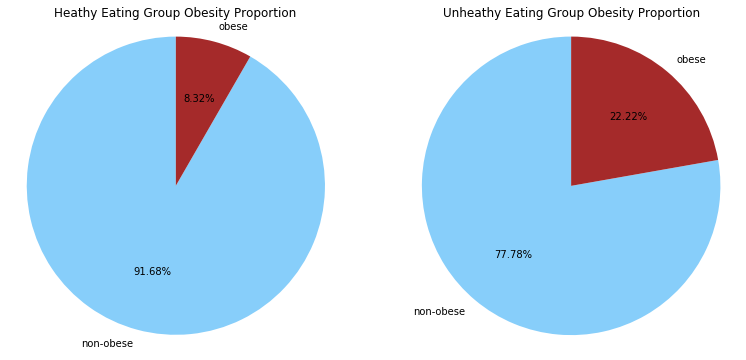

In [920]:
fig1 = plt.figure(figsize=(13,6))
ax1 = fig1.add_subplot(121)
labels =['non-obese','obese']
sizes = [970,88]
colors = ['lightskyblue','brown']
explode = (0,0)
patches,text1,text2 = ax1.pie(sizes,
                      explode=explode,
                      labels=labels,colors=colors,
                      autopct = '%3.2f%%',
                      shadow = False,startangle =90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.title('Heathy Eating Group Obesity Proportion')
sizes = [707,202]
ax2 = fig1.add_subplot(122)
patches,text1,text2 = ax2.pie(sizes,
                      explode=explode,
                      labels=labels,colors=colors,
                      autopct = '%3.2f%%',
                      shadow = False,startangle =90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.title('Unheathy Eating Group Obesity Proportion')
plt.show()

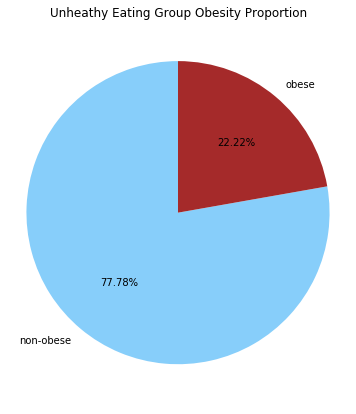

In [912]:
plt.figure(figsize=(6,7))
labels =['non-obese','obese']
sizes = [707,202]
colors = ['lightskyblue','brown']
explode = (0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,colors=colors,
                      autopct = '%3.2f%%',
                      shadow = False,startangle =90,
                      pctdistance = 0.6)
plt.axis('equal')
plt.title('Unheathy Eating Group Obesity Proportion')
plt.show()

In [730]:
y_k3=pd.concat([y,labels_kmeans.k3],axis=1)  
group = y_k3.groupby(['obese_s_01','k3']).size()
group

obese_s_01  k3
0           0     472
            1     685
            2     520
1           0     116
            1      43
            2     131
dtype: int64

In [736]:
y_k4=pd.concat([y,labels_kmeans.k4],axis=1)  
group = y_k4.groupby(['obese_s_01','k4']).size()
group

obese_s_01  k4
0           0     492
            1     101
            2     681
            3     403
1           0      92
            1      29
            2      46
            3     123
dtype: int64

In [737]:
y_k5=pd.concat([y,labels_kmeans.k5],axis=1)  
group = y_k5.groupby(['obese_s_01','k5']).size()
group

obese_s_01  k5
0           0      88
            1     377
            2     269
            3     540
            4     403
1           0      31
            1     102
            2      44
            3      37
            4      76
dtype: int64

In [727]:
group[0]

k3
0    472
1    685
2    520
dtype: int64

In [733]:
y_k=pd.concat([y,labels_kmeans],axis=1)
y_k.head()

,obese_s_01,k2,k3,k4,k5
0,1,0,1,2,3
1,0,1,2,1,0
2,0,0,0,3,3
3,1,1,2,0,0
4,0,0,0,2,2


In [734]:
from sklearn.feature_selection import chi2

In [839]:
chi2(labels_kmeans, y)

(array([40.45048881,  0.12785539,  1.42733615, 15.30086869]),
 array([2.01661991e-10, 7.20666086e-01, 2.32199673e-01, 9.16743440e-05]))

In [840]:
k2 = labels_kmeans.k2

In [841]:
type(labels_kmeans)

pandas.core.frame.DataFrame

In [842]:
labels_kmeans.shape

(1967, 4)

In [903]:
X.iloc[:,208:231].head() # some eating habits

,s_q7_1,s_q7_2,s_q7_3,s_q7_4,s_q7_5,s_q7_6,s_q8_1,s_q8_2,s_q8_3,s8_4_cikolatali_meyveli_sut,...,s_q9_3,s_q9_4,s_q9_5,s_q9_6,s_q9_7,s_q9_8,s_q9_9,s_q9_10,s_q9_11,s_q10
0,4,3,1,4,4,4,4,4,4,3,...,1,1,1,1,1,1,1,1,1,2
1,4,5,4,4,5,4,3,4,4,3,...,2,1,1,1,2,1,1,2,1,2
2,4,1,3,4,3,4,4,4,4,3,...,1,1,1,1,1,1,1,1,1,1
3,3,5,1,3,3,4,3,3,4,2,...,1,1,1,2,3,1,1,2,1,4
4,3,4,3,4,4,4,3,4,3,4,...,1,1,2,2,1,2,1,1,1,2


In [904]:
chi2(X.iloc[:,208:231],y_k.k2)

(array([ 9.5839184 , 17.46123937, 16.61519034, 13.13656388,  3.23650612,
         1.36829548, 12.8460679 , 23.82928594,  6.32079868,  6.53860659,
         8.24025216, 10.88399715, 14.2894456 ,  8.67919473, 10.72794698,
        20.93183207, 39.38099574, 33.25087027, 25.26758454, 15.78449501,
        37.94615923, 37.75485527,  4.60121649]),
 array([1.96289038e-03, 2.93225504e-05, 4.57828654e-05, 2.89588458e-04,
        7.20140595e-02, 2.42104960e-01, 3.38189151e-04, 1.05268596e-06,
        1.19329870e-02, 1.05557997e-02, 4.09714399e-03, 9.69986856e-04,
        1.56741267e-04, 3.21863171e-03, 1.05529466e-03, 4.75920010e-06,
        3.48673955e-10, 8.10034949e-09, 4.99025247e-07, 7.09818272e-05,
        7.27240957e-10, 8.02168174e-10, 3.19492783e-02]))

In [880]:
column[223:230]

Index(['s_q9_5', 's_q9_6', 's_q9_7', 's_q9_8', 's_q9_9', 's_q9_10', 's_q9_11'], dtype='object')

In [810]:
labels

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [809]:
labels = np.array(labels_kmeans.k2).reshape(-1, 1)

In [761]:
dummied_labels_3 = pd.get_dummies(labels_kmeans.k3)
dummied_labels.head()

,0,1,2
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


In [762]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
y_c = np.array(y).reshape(-1, 1)

In [772]:
#k=2
labels = np.array(labels_kmeans.k2).reshape(-1, 1)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(labels, y_c)
y_pred = clf.predict(labels)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [773]:
clf.score(labels, y_c)

0.595831215048297

In [768]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [769]:
print(confusion_matrix(y_pred, y_c))
print('-----------------------------------------------------------')
print(classification_report(y_pred, y_c))

[[970  88]
 [707 202]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.92      0.71      1058
           1       0.70      0.22      0.34       909

   micro avg       0.60      0.60      0.60      1967
   macro avg       0.64      0.57      0.52      1967
weighted avg       0.63      0.60      0.54      1967



In [775]:
#k=3
dummied_labels = pd.get_dummies(labels_kmeans.k3)
#labels = np.array(labels_kmeans.k2).reshape(-1, 1)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(dummied_labels, y)
y_pred = clf.predict(dummied_labels)
clf.score(dummied_labels, y)

0.47381799694966953

In [776]:
print(confusion_matrix(y_pred, y))
print('-----------------------------------------------------------')
print(classification_report(y_pred, y))

[[685  43]
 [992 247]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.94      0.57       728
           1       0.85      0.20      0.32      1239

   micro avg       0.47      0.47      0.47      1967
   macro avg       0.63      0.57      0.45      1967
weighted avg       0.69      0.47      0.41      1967



In [777]:
#k=4
dummied_labels = pd.get_dummies(labels_kmeans.k4)
#labels = np.array(labels_kmeans.k2).reshape(-1, 1)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(dummied_labels, y)
y_pred = clf.predict(dummied_labels)
clf.score(dummied_labels, y)

0.4702592780884596

In [778]:
print(confusion_matrix(y_pred, y))
print('-----------------------------------------------------------')
print(classification_report(y_pred, y))

[[681  46]
 [996 244]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.41      0.94      0.57       727
           1       0.84      0.20      0.32      1240

   micro avg       0.47      0.47      0.47      1967
   macro avg       0.62      0.57      0.44      1967
weighted avg       0.68      0.47      0.41      1967



In [779]:
#k=5
dummied_labels = pd.get_dummies(labels_kmeans.k5)
#labels = np.array(labels_kmeans.k2).reshape(-1, 1)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(dummied_labels, y)
y_pred = clf.predict(dummied_labels)
clf.score(dummied_labels, y)

0.5175394001016776

In [780]:
print(confusion_matrix(y_pred, y))
print('-----------------------------------------------------------')
print(classification_report(y_pred, y))

[[809  81]
 [868 209]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.91      0.63       890
           1       0.72      0.19      0.31      1077

   micro avg       0.52      0.52      0.52      1967
   macro avg       0.60      0.55      0.47      1967
weighted avg       0.61      0.52      0.45      1967



In [608]:
#df_clean.iloc[kmeans.labels_==1]
#How to find the physical meaning of clusters?

In [255]:
# Density-based Clustering DBSCAN
from sklearn.cluster import DBSCAN

In [323]:
clustering = DBSCAN(eps=30, min_samples=28, algorithm= 'auto').fit(X) #should fit X_ss

In [324]:
clustering.labels_

array([ 0, -1, -1, ...,  1,  0,  0])

In [337]:
pd.value_counts(clustering.labels_)

 1    922
 0    548
-1    496
dtype: int64

In [319]:
# It's hard to find the suitable parameters of DBSCAN which min -1 label 
#and clustering data into two or more clusters
for eps in range(15,40,3):
    for mi in range(10,15,3):
        clustering = DBSCAN(eps=eps, min_samples=mi, algorithm= 'auto').fit(X_ss)
        print(eps , mi)
        print(pd.value_counts(clustering.labels_))

15 10
-1    1966
dtype: int64
15 13
-1    1966
dtype: int64
18 10
-1    1966
dtype: int64
18 13
-1    1966
dtype: int64
21 10
-1    994
 0    972
dtype: int64
21 13
-1    998
 0    968
dtype: int64
24 10
 0    1810
-1     156
dtype: int64
24 13
 0    1808
-1     158
dtype: int64
27 10
 0    1958
-1       8
dtype: int64
27 13
 0    1958
-1       8
dtype: int64
30 10
 0    1965
-1       1
dtype: int64
30 13
 0    1965
-1       1
dtype: int64
33 10
0    1966
dtype: int64
33 13
0    1966
dtype: int64
36 10
0    1966
dtype: int64
36 13
0    1966
dtype: int64
39 10
0    1966
dtype: int64
39 13
0    1966
dtype: int64


In [164]:
pd.value_counts(clustering.labels_) #eps=30, min_samples=28

 1    922
 0    548
-1    496
dtype: int64

In [92]:
pd.value_counts(clustering.labels_) #eps=33, min_samples=15

 0    1915
-1      51
dtype: int64

In [691]:
label = clustering.labels_.reshape(-1, 1)
y_c = np.array(y).reshape(-1, 1)
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(label, y_c)
clf.score(labels, y_c)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4875444839857651

In [692]:
print(confusion_matrix(label, y_c))
print('-----------------------------------------------------------')
print(classification_report(label, y_c))

[[892 264 106]
 [366 155 184]
 [  0   0   0]]
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1262
           1       0.37      0.22      0.28       705
           2       0.00      0.00      0.00         0

   micro avg       0.53      0.53      0.53      1967
   macro avg       0.36      0.31      0.33      1967
weighted avg       0.59      0.53      0.55      1967



/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [611]:
#Gaussian mixtures Distribution-based Clustering
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2, covariance_type='full',random_state=42)
clf.fit(X_ss)
y_p = clf.predict(X_ss)

In [612]:
pd.value_counts(y_p)

1    1088
0     879
dtype: int64

In [613]:
y_p=np.array(y_p).reshape(-1, 1)

In [614]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(y_p, y)
y_pred = clf.predict(y_p)
y_pred=np.array(y_pred).reshape(-1, 1)
clf.score(y_pred, y)

0.41331977630910016

In [615]:
print(confusion_matrix(y_pred, y))
print('-----------------------------------------------------------')
print(classification_report(y_pred, y))

[[976 112]
 [701 178]]
-----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.58      0.90      0.71      1088
         1.0       0.61      0.20      0.30       879

   micro avg       0.59      0.59      0.59      1967
   macro avg       0.60      0.55      0.51      1967
weighted avg       0.60      0.59      0.53      1967



In [620]:
#Single linkage hierarchical clustering  Or Ward Connectivity-based Clustering
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering().fit(X_ss)
y_p = clf.labels_
pd.value_counts(y_p)

1    995
0    972
dtype: int64

In [621]:
clf.get_params

<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func='deprecated')>

In [617]:
y_p=np.array(y_p).reshape(-1, 1)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',class_weight='balanced').fit(y_p, y)
y_pred = clf.predict(y_p)
y_pred=np.array(y_pred).reshape(-1, 1)
clf.score(y_pred, y)

0.5256736146415861

In [618]:
print(confusion_matrix(y_pred, y))
print('-----------------------------------------------------------')
print(classification_report(y_pred, y))

[[858 114]
 [819 176]]
-----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.51      0.88      0.65       972
         1.0       0.61      0.18      0.27       995

   micro avg       0.53      0.53      0.53      1967
   macro avg       0.56      0.53      0.46      1967
weighted avg       0.56      0.53      0.46      1967



In [897]:
k2

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
mls = [SVM,lsvm,knn,lr,dt,rf,rfb,ab,nb]
result_over = pd.DataFrame(columns=['accuracy', 'precision', 'recall','specifity','f1'])
for i in range(len(mls)):
    mls[i].fit(X_ss_train, y_train) 
    y_pred = mls[i].predict(X_ss_test)
    accuracy=accuracy_score(y_test, y_pred)
    print(mls[i])
    print(accuracy)
    print(confusion_matrix(y_test, y_pred))
    print('-----------------------------------------------------------')
    print(classification_report(y_test, y_pred))
    scores = pd.DataFrame(classification_report(y_test, y_pred,output_dict = True))
    result_over.loc[i]=[accuracy,scores.iloc[1,1],scores.iloc[2,1],scores.iloc[2,0],scores.iloc[0,1]]

In [2]:
set('A').issubset(set('A'))

True